In [66]:
# libs 
import pandas as pd
import nltk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords

nltk.download('all')
nltk.download('stopwords')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/maryellenschuster/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/maryellenschuster/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /Users/maryellenschuster/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /Users/maryellenschuster/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /Users/maryellenschuster/nltk_data...
[nltk_data]    |   Package basque_grammars is a

True

In [67]:
#read in data 
barbie_data = pd.read_csv("barbie_Cleaned.csv")
barbie_data = barbie_data[barbie_data['rating'] != '1']
barbie_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 533 entries, 0 to 795
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    533 non-null    object
 1   rating  533 non-null    object
dtypes: object(2)
memory usage: 12.5+ KB


In [68]:
barbie_data.head()


,text,rating
0,"Beautiful film, but so preachyLoveofLegacy21 J...",6
1,Clever and fun beginning turns into another le...,6
2,It was depressingcoxaneesa24 July 2023Warning:...,8
3,A Technicolor Dreamheatherhilgers24 July 2023W...,9
4,reasons FOR seeing it and 1 reason AGAINST.im...,7


In [69]:
#clean text

#separate conjoined words using wordninja 
import wordninja
barbie_data['text'] = barbie_data['text'].apply(lambda x: ' '.join(wordninja.split(x)))
barbie_data

,text,rating
0,Beautiful film but so preachy Love of Legacy 2...,6
1,Clever and fun beginning turns into another le...,6
2,It was depressing cox a nees a 24 July 2023 Wa...,8
3,A Technicolor Dream heather hil gers 24 July 2...,9
4,reasons FOR seeing it and 1 reason AGAINST im ...,7
...,...,...
791,Waste of times an as hak ib 23 July 2023 If ur...,2
792,Barbie not good thong man 22 July 2023 The onl...,2
793,Feminism but the rest iy as emin kos e 23 July...,5
794,Great sets great execution but horrible storyl...,3


In [70]:
#create date column
barbie_data = pd.DataFrame(barbie_data)

# Extract date using regular expression
date_pattern = r'(\d{1,2})\s(July)\s(\d{4})'
barbie_data['full_date'] = barbie_data['text'].str.extract(date_pattern).apply(lambda x: ' '.join(x), axis=1)

# Display DataFrame with new column
print(barbie_data['full_date'])

0      21 July 2023
1      21 July 2023
2      24 July 2023
3      24 July 2023
4      22 July 2023
           ...     
791    23 July 2023
792    22 July 2023
793    23 July 2023
794    28 July 2023
795    27 July 2023
Name: full_date, Length: 533, dtype: object


In [71]:
#clean 

#remove non words 

#import enchant 


#def remove_non_english_words(text):
#    english_dictionary = enchant.Dict("en_US")  # Use the English (US) dictionary

 #   separated_words = text.split()
 #   valid_words = [word for word in separated_words if english_dictionary.check(word)]

 #   return ' '.join(valid_words)


#barbie_data['text'] = barbie_data['text'].apply(remove_non_english_words)
#barbie_data

with open('words.txt', 'r') as file:
    english_words = set(word.strip().lower() for word in file)

# Define a function to remove non-English words
def remove_non_english_words(text):
    words = text.split()
    valid_words = [word for word in words if word.lower() in english_words]
    return ' '.join(valid_words)

# Apply the function to your DataFrame
barbie_data['text'] = barbie_data['text'].apply(remove_non_english_words)

barbie_data



,text,rating,full_date
0,Beautiful film but so preachy Love of Legacy J...,6,21 July 2023
1,Clever and fun beginning turns into another le...,6,21 July 2023
2,It was depressing cox a a July Warning Spoiler...,8,24 July 2023
3,A Technicolor Dream heather gers July Wow this...,9,24 July 2023
4,reasons FOR seeing it and reason AGAINST im se...,7,22 July 2023
...,...,...,...
791,Waste of times an as hak ib July If ur over th...,2,23 July 2023
792,Barbie not good thong man July The only reason...,2,22 July 2023
793,Feminism but the rest iy as kos e July I'm NOT...,5,23 July 2023
794,Great sets great execution but horrible storyl...,3,28 July 2023


In [72]:
#clean text 

#remove numbers
import re
barbie_data['text'] = barbie_data['text'].apply(lambda x: re.sub(r'\d+', '', x) if isinstance(x, str) else x)

barbie_data

,text,rating,full_date
0,Beautiful film but so preachy Love of Legacy J...,6,21 July 2023
1,Clever and fun beginning turns into another le...,6,21 July 2023
2,It was depressing cox a a July Warning Spoiler...,8,24 July 2023
3,A Technicolor Dream heather gers July Wow this...,9,24 July 2023
4,reasons FOR seeing it and reason AGAINST im se...,7,22 July 2023
...,...,...,...
791,Waste of times an as hak ib July If ur over th...,2,23 July 2023
792,Barbie not good thong man July The only reason...,2,22 July 2023
793,Feminism but the rest iy as kos e July I'm NOT...,5,23 July 2023
794,Great sets great execution but horrible storyl...,3,28 July 2023


In [73]:
#remove phrases
phrases_to_remove = ['found', 'helpful', 'review', 'Sign','vote', 'Permalink', 'Warning', 'Spoilers', 'July']
barbie_data['text'] = barbie_data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in phrases_to_remove]) if isinstance(x, str) else x)

barbie_data

,text,rating,full_date
0,Beautiful film but so preachy Love of Legacy M...,6,21 July 2023
1,Clever and fun beginning turns into another le...,6,21 July 2023
2,It was depressing cox a a out of this Was this...,8,24 July 2023
3,A Technicolor Dream heather gers Wow this movi...,9,24 July 2023
4,reasons FOR seeing it and reason AGAINST im se...,7,22 July 2023
...,...,...,...
791,Waste of times an as hak ib If ur over this mo...,2,23 July 2023
792,Barbie not good thong man The only reason this...,2,22 July 2023
793,Feminism but the rest iy as kos e I'm NOT a Ba...,5,23 July 2023
794,Great sets great execution but horrible storyl...,3,28 July 2023


In [74]:
#remove punctuation 
import string
barbie_data['text'] = barbie_data['text'].apply(lambda x: x.translate(str.maketrans("", "", string.punctuation)) if isinstance(x, str) else x)

barbie_data

,text,rating,full_date
0,Beautiful film but so preachy Love of Legacy M...,6,21 July 2023
1,Clever and fun beginning turns into another le...,6,21 July 2023
2,It was depressing cox a a out of this Was this...,8,24 July 2023
3,A Technicolor Dream heather gers Wow this movi...,9,24 July 2023
4,reasons FOR seeing it and reason AGAINST im se...,7,22 July 2023
...,...,...,...
791,Waste of times an as hak ib If ur over this mo...,2,23 July 2023
792,Barbie not good thong man The only reason this...,2,22 July 2023
793,Feminism but the rest iy as kos e Im NOT a Bar...,5,23 July 2023
794,Great sets great execution but horrible storyl...,3,28 July 2023


In [75]:
def remove_non_word_letters(text):
    words = wordninja.split(text)
    valid_words = [word for word in words if word.isalpha()]
    return ' '.join(valid_words)

# Apply the function to the 'text' column
barbie_data['text'] = barbie_data['text'].apply(remove_non_word_letters)
barbie_data

,text,rating,full_date
0,Beautiful film but so preachy Love of Legacy M...,6,21 July 2023
1,Clever and fun beginning turns into another le...,6,21 July 2023
2,It was depressing cox a a out of this Was this...,8,24 July 2023
3,A Technicolor Dream heather gers Wow this movi...,9,24 July 2023
4,reasons FOR seeing it and reason AGAINST im se...,7,22 July 2023
...,...,...,...
791,Waste of times an as hak ib If ur over this mo...,2,23 July 2023
792,Barbie not good thong man The only reason this...,2,22 July 2023
793,Feminism but the rest iy as kos e Im NOT a Bar...,5,23 July 2023
794,Great sets great execution but horrible storyl...,3,28 July 2023


In [76]:
#clean rating
barbie_data['rating'] = pd.to_numeric(barbie_data['rating'], errors = 'coerce')

#drop NaN
barbie_data = barbie_data.dropna(subset = ['rating'])

barbie_data['text']
barbie_data.head()

,text,rating,full_date
0,Beautiful film but so preachy Love of Legacy M...,6.0,21 July 2023
1,Clever and fun beginning turns into another le...,6.0,21 July 2023
2,It was depressing cox a a out of this Was this...,8.0,24 July 2023
3,A Technicolor Dream heather gers Wow this movi...,9.0,24 July 2023
4,reasons FOR seeing it and reason AGAINST im se...,7.0,22 July 2023


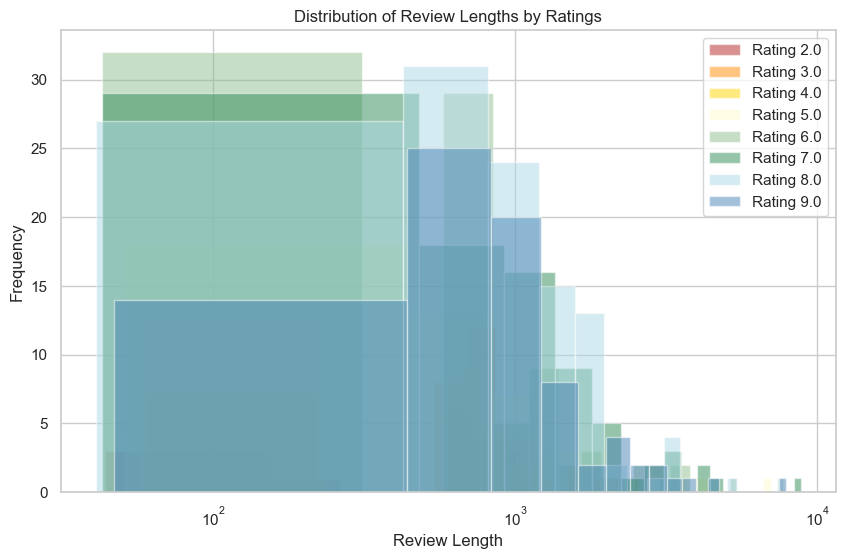

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data (replace this with your actual data loading)

df = pd.DataFrame(barbie_data)

df['review_length'] = df['text'].apply(len)

# Plot distribution of review lengths relative to ratings
colors = {1: 'darksalmon', 2: 'firebrick', 3: 'darkorange', 4: 'gold', 5: 'lemonchiffon', 6: 'darkseagreen', 7:'seagreen', 8: 'lightblue', 9: 'steelblue'}

# Plot distribution of review lengths relative to ratings
plt.figure(figsize=(10, 6))
for rating in sorted(df['rating'].unique()):
    subset = df[df['rating'] == rating]
    plt.hist(subset['review_length'], bins=20, alpha=0.5, label=f'Rating {rating}', color=colors[rating])

plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.title('Distribution of Review Lengths by Ratings')
plt.legend()
plt.grid(True)
plt.xscale('log')
plt.show()


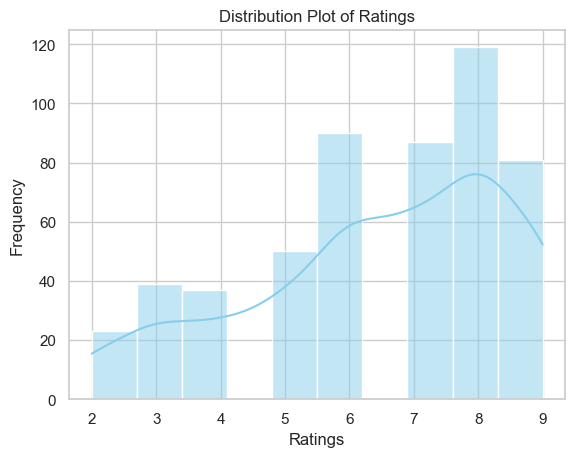

In [78]:


# Sample ratings data
ratings_data = barbie_data['rating']

# Create a pandas DataFrame
df = pd.DataFrame({'ratings': ratings_data})

# Create a distribution plot using Seaborn
sns.set(style="whitegrid")  # Set the style
sns.histplot(df['ratings'], kde=True, bins=10, color='skyblue')  # Create the distribution plot
plt.title('Distribution Plot of Ratings')  # Add title
plt.xlabel('Ratings')  # Add x-axis label
plt.ylabel('Frequency')  # Add y-axis label
plt.show()


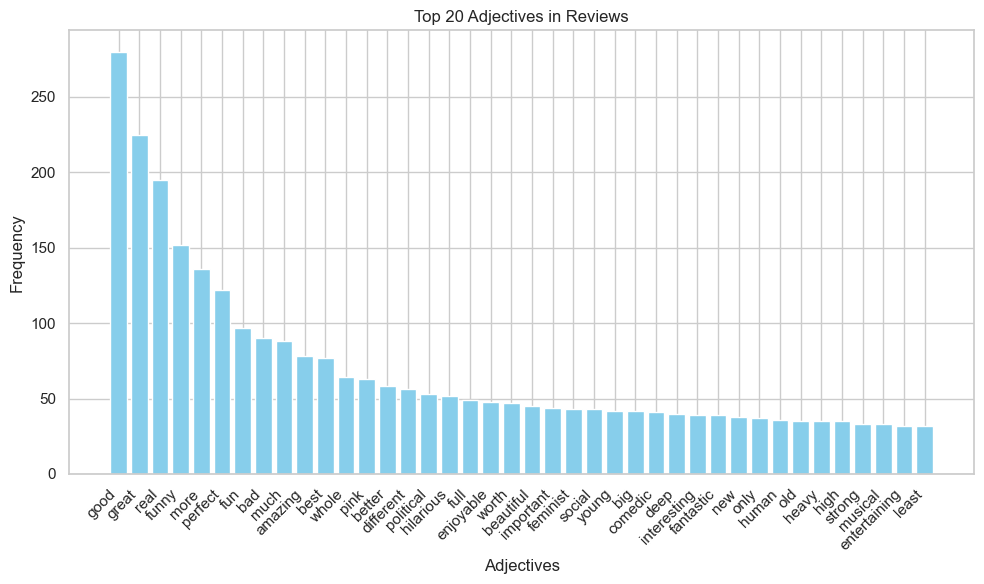

In [79]:
import spacy
from collections import Counter
import matplotlib.pyplot as plt

# Load the English language model
nlp = spacy.load("en_core_web_sm")

# Sample list of reviews (replace with your own list of reviews)
reviews = barbie_data['text']

words_to_remove = ['other', 'sure', 'first', 'many', 'same', 'own', 'little', 'most', 'few', 'main', 'such']

# Function to extract adjectives from a SpaCy parsed document
def extract_adjectives(doc):
    adjectives = [token.text for token in doc if token.pos_ == 'ADJ' and token.text.lower() not in words_to_remove]
    return adjectives

# Tokenize each review, parse them using SpaCy, and extract adjectives
adjectives = []
for review in reviews:
    doc = nlp(review)
    adjectives.extend(extract_adjectives(doc))

# Count the frequency of each adjective
adjective_freq = Counter(adjectives)

top_40_adjectives = dict(adjective_freq.most_common(40))

# Plotting the frequency distribution for the top 20 adjectives
plt.figure(figsize=(10, 6))
plt.bar(top_40_adjectives.keys(), top_40_adjectives.values(), color='skyblue')
plt.xlabel('Adjectives')
plt.ylabel('Frequency')
plt.title('Top 20 Adjectives in Reviews')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [80]:
#get vader scores 
import nltk
nltk.data.path.append('/Users/maryellenschuster/nltk_data')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd

barbie_data['vader_scores'] = barbie_data['text'].apply(lambda x: SentimentIntensityAnalyzer().polarity_scores(x)['compound'])
barbie_data

/var/folders/6g/7fqxn4216jl8m88cxmwr0rdh0000gn/T/ipykernel_69602/2465558197.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  barbie_data['vader_scores'] = barbie_data['text'].apply(lambda x: SentimentIntensityAnalyzer().polarity_scores(x)['compound'])


,text,rating,full_date,vader_scores
0,Beautiful film but so preachy Love of Legacy M...,6.0,21 July 2023,0.9857
1,Clever and fun beginning turns into another le...,6.0,21 July 2023,0.8910
2,It was depressing cox a a out of this Was this...,8.0,24 July 2023,-0.3818
3,A Technicolor Dream heather gers Wow this movi...,9.0,24 July 2023,0.9653
4,reasons FOR seeing it and reason AGAINST im se...,7.0,22 July 2023,0.0000
...,...,...,...,...
791,Waste of times an as hak ib If ur over this mo...,2.0,23 July 2023,-0.1825
792,Barbie not good thong man The only reason this...,2.0,22 July 2023,0.5922
793,Feminism but the rest iy as kos e Im NOT a Bar...,5.0,23 July 2023,0.7934
794,Great sets great execution but horrible storyl...,3.0,28 July 2023,0.9729


In [81]:
barbie_data['vader_scores'] = pd.to_numeric(barbie_data['vader_scores'])
barbie_data['rating'] = pd.to_numeric(barbie_data['rating'])

/var/folders/6g/7fqxn4216jl8m88cxmwr0rdh0000gn/T/ipykernel_69602/2472219045.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  barbie_data['vader_scores'] = pd.to_numeric(barbie_data['vader_scores'])
/var/folders/6g/7fqxn4216jl8m88cxmwr0rdh0000gn/T/ipykernel_69602/2472219045.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  barbie_data['rating'] = pd.to_numeric(barbie_data['rating'])


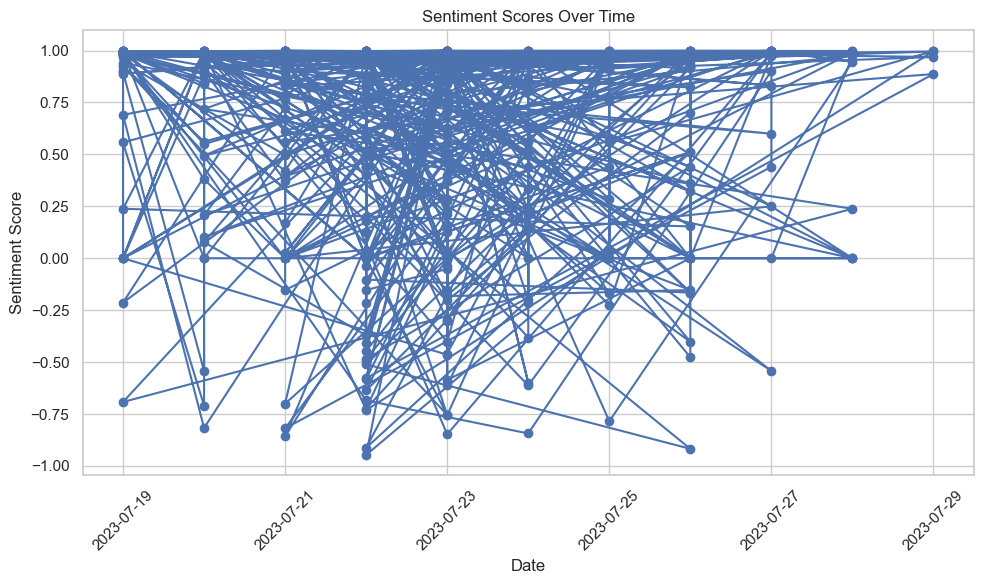

In [82]:


df = pd.DataFrame(barbie_data)
df['full_date'] = pd.to_datetime(df['full_date'])  # Convert date column to datetime format

# Plot sentiment scores over time
plt.figure(figsize=(10, 6))
plt.plot(df['full_date'], df['vader_scores'], marker='o', color='b', linestyle='-')

plt.title('Sentiment Scores Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()

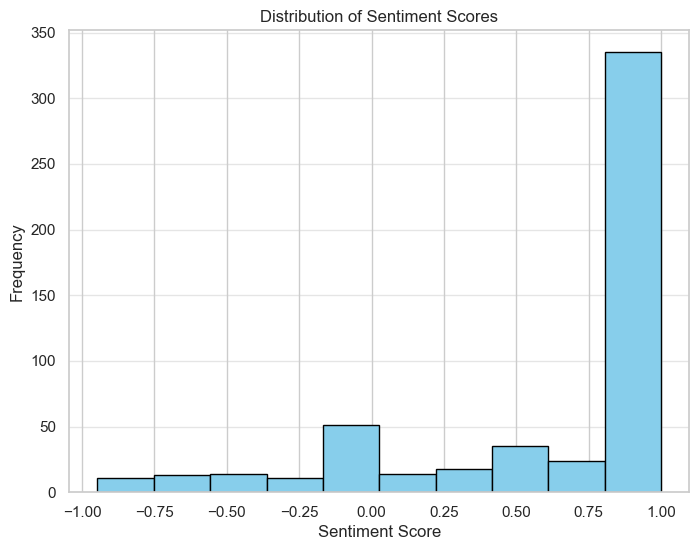

In [83]:
import matplotlib.pyplot as plt

# Example sentiment scores (replace this with your actual sentiment scores)
sentiment_scores = barbie_data['vader_scores']

# Plotting the distribution of sentiment scores
plt.figure(figsize=(8, 6))
plt.hist(sentiment_scores, bins=10, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.5)
plt.show()

In [84]:
X = barbie_data['vader_scores']
y = barbie_data['rating']

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [86]:
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

In [87]:
#linear regression model 
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [88]:
predictions = model.predict(X_test)

In [89]:
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

barbie_data.head(20)

Mean Squared Error: 4.40
R-squared: 0.04


Correlation Coefficient: 0.27470708154562046


/var/folders/6g/7fqxn4216jl8m88cxmwr0rdh0000gn/T/ipykernel_69602/910569266.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  barbie_data.dropna(inplace=True)


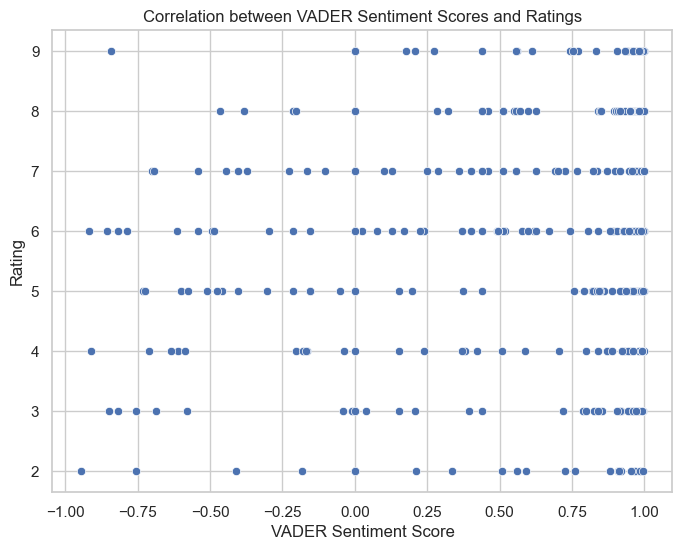

In [92]:


# Check if there are any missing values and handle them if necessary
barbie_data.dropna(inplace=True)

# Assuming 'sentiment_score' and 'rating' are numerical variables
# Create a scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
sns.scatterplot(x='vader_scores', y='rating', data=barbie_data)
plt.title('Correlation between VADER Sentiment Scores and Ratings')
plt.xlabel('VADER Sentiment Score')
plt.ylabel('Rating')
plt.grid(True)

# Calculate the correlation coefficient
correlation_coefficient = barbie_data['vader_scores'].corr(barbie_data['rating'])
print(f"Correlation Coefficient: {correlation_coefficient}")

# Show the plot
plt.show()